<a href="https://colab.research.google.com/github/lloyd585/lloyd585/blob/main/B1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


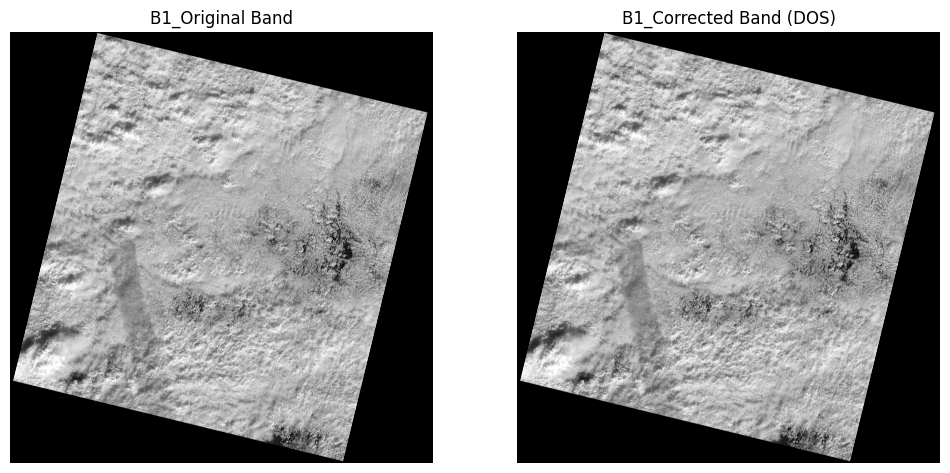

In [9]:
# Install required libraries
!pip install rasterio numpy matplotlib

import rasterio
import numpy as np
import matplotlib.pyplot as plt

# Function to apply Dark Object Subtraction (DOS) atmospheric correction
def atmospheric_correction_dos(band_data):

  """
   Arg:
      Perform atmospheric correction using Dark Object Subtraction (DOS).
      The darkest value is assumed to be 0, and we subtract it from the image.

      band_data: numpy array
      Input band data to be corrected.

      Returns:
      Corrected band data (numpy array)
  """
  # Find the minimum value (darkest object)
  dark_object_value = np.min(band_data)

  # Perform Dark Object Subtraction
  corrected_band = band_data - dark_object_value

  # Ensure no negative values (clip to zero if necessary)
  corrected_band[corrected_band < 0] = 0
  return corrected_band

# Function to read Landsat band and perform atmospheric correction
def process_band(band_path):

  """
      Reads a Landsat band and applies atmospheric correction.

      band_path: str
      Path to the Landsat band file.

      Returns:
      Corrected band data (numpy array)
  """
  # Read the band using rasterio
  with rasterio.open(band_path) as band:
    band_data = band.read(1) # Read the first band (data)

  # Perform atmospheric correction
    corrected_band = atmospheric_correction_dos(band_data)
    return corrected_band

# Function to plot the band before and after atmospheric correction
def plot_bands(before, after):

 """
    Plot the original band and the corrected band for comparison.

    before_bands: list of numpy arrays
     List of Original (uncorrected) band data.
    after_bands: List of numpy arrays
     List of Atmospheric corrected band data.
    band_names: list of str
    List of band names for the plot titles.
"""

 fig, axes = plt.subplots(1, 2,  figsize=(12, 6))
 axes[0].imshow(before, cmap='gray')
 axes[0].set_title('B1_Original Band')
 axes[0].axis('off')
 axes[1].imshow(after, cmap='gray')
 axes[1].set_title('B1_Corrected Band (DOS)')
 axes[1].axis('off')

plt.show()

# Mount Google Drive (if your Landsat image is in Drive)
from google.colab import drive
drive.mount('/content/drive')

# Set the file path for the Landsat band (e.g., Band 2, Band 5, etc.)
band_path = '/content/drive/My Drive/Landsat bands/L8/LC08_L2SP_021039_20221220_20221227_02_T2_SR_B1.TIF'

# Process the band
corrected_band = process_band(band_path)

# Read the original band (for comparison)
with rasterio.open(band_path) as band:
    original_band = band.read(1)
    meta = band.meta  #store the metadata (e.g CRS, transform)

# create outout path
output_path = '/content/drive/My Drive/Landsat bands/L8/B1corrected_band.TIF'

#Save the corrected band as a new Tiff file
with rasterio.open(output_path, 'w', **meta) as dst:
    dst.write(corrected_band, 1)

# Plot the original and corrected bands
plot_bands(original_band, corrected_band)
